In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

429


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,89ceb09a69f6dd22d587ad0e1d1161a7f31b166d,coxal-eyas,bdsaglam/musique,answerable,validation,llama-3.3-70b,1.0,cok/adapted.txt,cq.txt,manual/cok.json,...,673,102.307578,30.530511,45,83.0,94.0,114.00,239,COK,cok/adapted:cq:manual/cok
1,569fe899f90c8bdaf47866bbb36fc24c88f4925c,sulfa-lame,bdsaglam/musique,answerable,validation,llama-3.3-70b,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,716,94.681564,60.827044,29,59.0,80.0,112.25,873,COT,cot/format-thought:cq:manual/cot
2,98498237a46b9b473706d7f773a27e67e30523d9,wacky-ciao,bdsaglam/musique,answerable,validation,llama-3.3-70b,0.5,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,686,52.836735,21.162000,18,39.0,48.0,61.00,177,CTE,cte/format-triples-ere-few:cq:manual/cte-triples
3,288b4a6bb49a305006dc7f891cc0c52cc0b77d0b,tarry-bani,bdsaglam/musique,answerable,validation,llama-3.3-70b,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,643,52.905132,26.209948,16,36.0,46.0,61.50,228,CTE,cte/format-triples-few:cq:manual/cte-triples
4,e3ed6981ac0d21340a3b5eca1e92696a1e7fdd0a,keyed-brig,bdsaglam/musique,answerable,validation,llama-3.3-70b,0.0,cot/format-thought.txt,cq.txt,manual/cot.json,...,709,92.279267,70.008643,23,52.0,75.0,104.00,839,COT,cot/format-thought:cq:manual/cot


In [16]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [17]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,above-yegg,deepseek-r1-llama-70b,0.0,direct/format-few.txt,cq.txt,reasoning.json,0,1,1,0.571783,...,733,1114.474761,1900.507203,134,311.00,422.0,895.00,8287,REASONING,direct/format-few:cq:empty
1,robed-scup,deepseek-r1-llama-70b,0.0,direct/format-few.txt,cq.txt,reasoning.json,0,1,2,0.570956,...,724,1157.750000,1961.936778,146,315.00,438.5,925.75,8120,REASONING,direct/format-few:cq:empty
2,amort-taro,deepseek-r1-llama-70b,0.0,direct/format-few.txt,cq.txt,reasoning.json,0,1,3,0.572611,...,720,1130.566667,1905.580668,136,309.75,436.0,945.25,8176,REASONING,direct/format-few:cq:empty
3,round-saut,deepseek-r1-llama-70b,0.0,direct/format-few.txt,cq.txt,manual/reasoning.json,1,1,2,0.572611,...,729,539.695473,390.147775,105,318.00,401.0,576.00,2605,REASONING,direct/format-few:cq:manual/reasoning
4,fishy-rise,deepseek-r1-llama-70b,0.0,empty.txt,icq-format.txt,reasoning.json,0,1,1,0.573024,...,740,1029.017568,1870.958700,144,289.75,385.0,733.75,8447,REASONING,empty:icq-format:empty


In [18]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df.drop(columns=['name'])

,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
38,llama-3-70b,0.0,COK,cok/adapted:cq:manual/cok,1,0.633016,0.745424
44,llama-3-70b,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,0.624604,0.740257
4,deepseek-r1-llama-70b,0.0,REASONING,empty:icq-format:manual/reasoning,1,0.588953,0.720204
40,llama-3-70b,0.0,COT,cot/format-thought:cq:manual/cot,1,0.604468,0.718662
36,llama-3-70b,0.0,CCOT,ccot/format-thought:cq:manual/ccot,1,0.604330,0.717449
63,llama-3-70b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,0.584333,0.702896


In [19]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
4,deepseek-r1-llama-70b,0.0,REASONING,empty:icq-format:manual/reasoning,1,"(flown-yogi, folio-cats)",0.588953,0.720204
5,deepseek-r1-llama-70b,0.5,REASONING,direct/format-few:cq:empty,0,"(alpha-mice, shoal-maya, cheek-yegg)",0.578679,0.714144
9,deepseek-r1-llama-70b,0.5,REASONING,empty:icq-format:manual/reasoning,1,"(messy-bosk, radio-afro, woods-azan)",0.576196,0.712872
6,deepseek-r1-llama-70b,0.5,REASONING,direct/format-few:cq:manual/reasoning,0,"(bawdy-orcs,)",0.573438,0.712774
10,deepseek-r1-llama-70b,1.0,REASONING,direct/format-few:cq:empty,0,"(iodic-sike, unfed-pond, stout-sail)",0.569852,0.709769
1,deepseek-r1-llama-70b,0.0,REASONING,direct/format-few:cq:manual/reasoning,1,"(round-saut,)",0.572611,0.707731
0,deepseek-r1-llama-70b,0.0,REASONING,direct/format-few:cq:empty,0,"(above-yegg, robed-scup, amort-taro)",0.571783,0.706431
7,deepseek-r1-llama-70b,0.5,REASONING,empty:icq-format:empty,0,"(mossy-jota, wight-rale, lived-mome)",0.565439,0.704382
8,deepseek-r1-llama-70b,0.5,REASONING,empty:icq-format:manual/reasoning,0,"(tangy-bomb, keyed-bade, coxal-jato)",0.560888,0.703219
2,deepseek-r1-llama-70b,0.0,REASONING,empty:icq-format:empty,0,"(fishy-rise, bonny-pond, choky-sike)",0.566543,0.699610


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
17,deepseek-r1-llama-8b,0.0,REASONING,empty:icq-format:empty,0,"(genic-eyot, puffy-work, twill-plow)",0.433457,0.582772
23,deepseek-r1-llama-8b,0.5,REASONING,direct/format-few:cq:manual/reasoning,0,"(moved-agma, diazo-awns, obese-mene)",0.424907,0.579845
15,deepseek-r1-llama-8b,0.0,REASONING,direct/format-few:cq:manual/reasoning,0,"(surgy-waws, tubby-dent, world-bani)",0.425734,0.579816
20,deepseek-r1-llama-8b,0.5,REASONING,direct/format-few:cq:empty,0,"(sassy-nosh, tough-snob, chirk-gimp)",0.426424,0.578818
25,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:empty,0,"(tenor-hobo, finny-orfe, every-maid)",0.429044,0.577548
13,deepseek-r1-llama-8b,0.0,REASONING,direct/format-few:cq:manual/direct,0,"(baggy-lift, whity-envy, gulfy-dops)",0.421183,0.575544
12,deepseek-r1-llama-8b,0.0,REASONING,direct/format-few:cq:empty,0,"(bitty-boar, local-whey, tense-wort)",0.426424,0.574984
21,deepseek-r1-llama-8b,0.5,REASONING,direct/format-few:cq:manual/direct,0,"(light-vega, mated-pons, enate-coho)",0.423942,0.574369
31,deepseek-r1-llama-8b,1.0,REASONING,empty:icq-format:empty,0,"(blind-seam, barky-dart, welsh-yapp)",0.407116,0.553715
29,deepseek-r1-llama-8b,1.0,REASONING,direct/format-few:cq:manual/direct,0,"(ferny-repp, mucky-mirk, stiff-suss)",0.393601,0.545715


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
33,deepseek-r1-qwen-32b,0.5,REASONING,empty:icq-format:empty,0,"(wider-weka, swell-flux, livid-stir)",0.483520,0.649522
32,deepseek-r1-qwen-32b,0.0,REASONING,empty:icq-format:empty,0,"(canny-judo, shaky-kite, flaky-epha)",0.483382,0.645980
34,deepseek-r1-qwen-32b,1.0,REASONING,empty:icq-format:empty,0,"(genic-tier, lardy-cors, lobar-says)",0.462833,0.637109


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
38,llama-3-70b,0.0,COK,cok/adapted:cq:manual/cok,1,"(angry-syce, blown-umbo, ortho-zack)",0.633016,0.745424
53,llama-3-70b,0.5,COK,cok/adapted:cq:manual/cok,1,"(elite-rort, focal-geum, wonky-dams)",0.634257,0.744743
44,llama-3-70b,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,"(still-wens, unapt-pope, typic-berk)",0.624604,0.740257
59,llama-3-70b,0.5,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,"(platy-dogs, umber-ruby, apish-coat)",0.623914,0.739079
67,llama-3-70b,1.0,COK,cok/adapted:cq:manual/cok,1,"(hulky-wart, cured-jots, taboo-lays)",0.621845,0.738994
57,llama-3-70b,0.5,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,1,"(gyral-vlei, tenor-hulk, unapt-juts)",0.614122,0.734153
61,llama-3-70b,0.5,CTE,cte/format-triples-few:cq:manual/cte-triples,1,"(tuned-quad, pagan-ices, ferny-esse)",0.612743,0.733321
42,llama-3-70b,0.0,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,1,"(lucky-lush, lardy-roam, cissy-pams)",0.614812,0.732739
37,llama-3-70b,0.0,COK,cok/adapted:cq:manual/cok,0,"(finer-yobs, gouty-sook, dumpy-song)",0.615915,0.732005
46,llama-3-70b,0.0,CTE,cte/format-triples-few:cq:manual/cte-triples,1,"(wiser-sing, cruel-gest, loral-snub)",0.613846,0.731818


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
81,llama-3-8b,0.0,COK,cok/adapted:cq:manual/cok,1,"(bifid-gust, roman-size)",0.546959,0.662102
95,llama-3-8b,0.5,COK,cok/adapted:cq:manual/cok,1,"(mealy-rime, stout-heck)",0.526272,0.645061
83,llama-3-8b,0.0,COT,cot/format-thought:cq:manual/cot,1,"(hoven-tier, proud-amyl, platy-flip)",0.516618,0.636055
79,llama-3-8b,0.0,CCOT,ccot/format-thought:cq:manual/ccot,1,"(apish-buck, power-rite, astir-zips)",0.517860,0.636020
93,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,"(ahull-geum, muggy-hunt, lamer-erns)",0.501862,0.624653
97,llama-3-8b,0.5,COT,cot/format-thought:cq:manual/cot,1,"(dread-sail, metal-inks, flush-loup)",0.503241,0.624094
80,llama-3-8b,0.0,COK,cok/adapted:cq:manual/cok,0,"(rabic-coal, other-shad)",0.502276,0.624058
82,llama-3-8b,0.0,COT,cot/format-thought:cq:manual/cot,0,"(wised-bold, piled-dawn, gushy-hits)",0.491380,0.608776
86,llama-3-8b,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,0,"(north-jerk, ortho-acne)",0.489243,0.607969
78,llama-3-8b,0.0,CCOT,ccot/format-thought:cq:manual/ccot,0,"(keyed-huia, dated-kifs, tarot-alga)",0.479244,0.604511


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
128,llama-3.3-70b,0.5,COK,cok/adapted:cq:manual/cok,1,"(lumpy-ludo, sural-iron, young-yobs)",0.618949,0.745093
141,llama-3.3-70b,1.0,COK,cok/adapted:cq:manual/cok,1,"(fatty-dolt, choky-barb, staid-tilt)",0.616329,0.740705
115,llama-3.3-70b,0.0,COK,cok/adapted:cq:manual/cok,1,"(webby-feme, coxal-bomb, bawdy-coat)",0.612881,0.738209
121,llama-3.3-70b,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,"(nicer-soke, unapt-dhow, swept-dees)",0.609019,0.737920
132,llama-3.3-70b,0.5,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,1,"(moved-pita, tidal-rotl, rural-wads)",0.612605,0.737671
134,llama-3.3-70b,0.5,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,"(chill-inks, cronk-dean, lucid-akes)",0.610536,0.736817
123,llama-3.3-70b,0.0,CTE,cte/format-triples-few:cq:manual/cte-triples,1,"(split-leaf, lowse-tils, prest-abbs)",0.607227,0.736013
136,llama-3.3-70b,0.5,CTE,cte/format-triples-few:cq:manual/cte-triples,1,"(matte-upas, tarry-bani, heapy-bunk)",0.603365,0.733563
119,llama-3.3-70b,0.0,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,1,"(dicey-tuts, tense-cuss, lunar-jest)",0.605158,0.732928
145,llama-3.3-70b,1.0,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,1,"(gemmy-nark, tumid-juts, grave-milo)",0.606399,0.732320


In [20]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
37,"(finer-yobs, gouty-sook, dumpy-song)",llama-3-70b,0.0,COK,cok/adapted:cq:manual/cok,0,0.615915,0.732005
140,"(coxal-eyas, alone-quay, sneak-soya)",llama-3.3-70b,1.0,COK,cok/adapted:cq:manual/cok,0,0.612054,0.730948
56,"(lardy-hoot, unapt-plug, lunar-jube)",llama-3-70b,0.5,CTE,cte/format-sro-triples-few:cq:manual/cte-triples,0,0.608468,0.727133
133,"(wrong-doss, tubby-jeer, wacky-ciao)",llama-3.3-70b,0.5,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,0,0.601848,0.725136
5,"(alpha-mice, shoal-maya, cheek-yegg)",deepseek-r1-llama-70b,0.5,REASONING,direct/format-few:cq:empty,0,0.578679,0.714144
35,"(weepy-nave, heigh-scup, mirky-rede)",llama-3-70b,0.0,CCOT,ccot/format-thought:cq:manual/ccot,0,0.594401,0.713077
116,"(loral-dart, dying-ghat, leery-inks)",llama-3.3-70b,0.0,COT,cot/format-thought:cq:manual/cot,0,0.573024,0.711503
125,"(lamer-cwms, guest-main, dress-lien)",llama-3.3-70b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,0,0.567646,0.709274
39,"(twill-pate, tamed-wave, total-esne)",llama-3-70b,0.0,COT,cot/format-thought:cq:manual/cot,0,0.585574,0.707536
47,"(genal-rick, grand-feel, oiled-song)",llama-3-70b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.560337,0.685531


In [21]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
38,"(angry-syce, blown-umbo, ortho-zack)",llama-3-70b,0.0,COK,cok/adapted:cq:manual/cok,1,0.633016,0.745424
44,"(still-wens, unapt-pope, typic-berk)",llama-3-70b,0.0,CTE,cte/format-triples-ere-few:cq:manual/cte-triples,1,0.624604,0.740257
4,"(flown-yogi, folio-cats)",deepseek-r1-llama-70b,0.0,REASONING,empty:icq-format:manual/reasoning,1,0.588953,0.720204
40,"(washy-boor, loath-stir, loved-tape)",llama-3-70b,0.0,COT,cot/format-thought:cq:manual/cot,1,0.604468,0.718662
36,"(yolky-clay, privy-impi, bushy-zoea)",llama-3-70b,0.0,CCOT,ccot/format-thought:cq:manual/ccot,1,0.604330,0.717449
63,"(kaput-zoea, losel-orle, godly-fish)",llama-3-70b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,0.584333,0.702896


In [22]:
avg_df[avg_df["params.qa.model"] == "deepseek-r1-llama-70b-tgi"].sort_values("metrics.f1", ascending=False).drop(columns=['params.qa.technique', 'name'])

,params.qa.model,params.qa.temperature,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [23]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

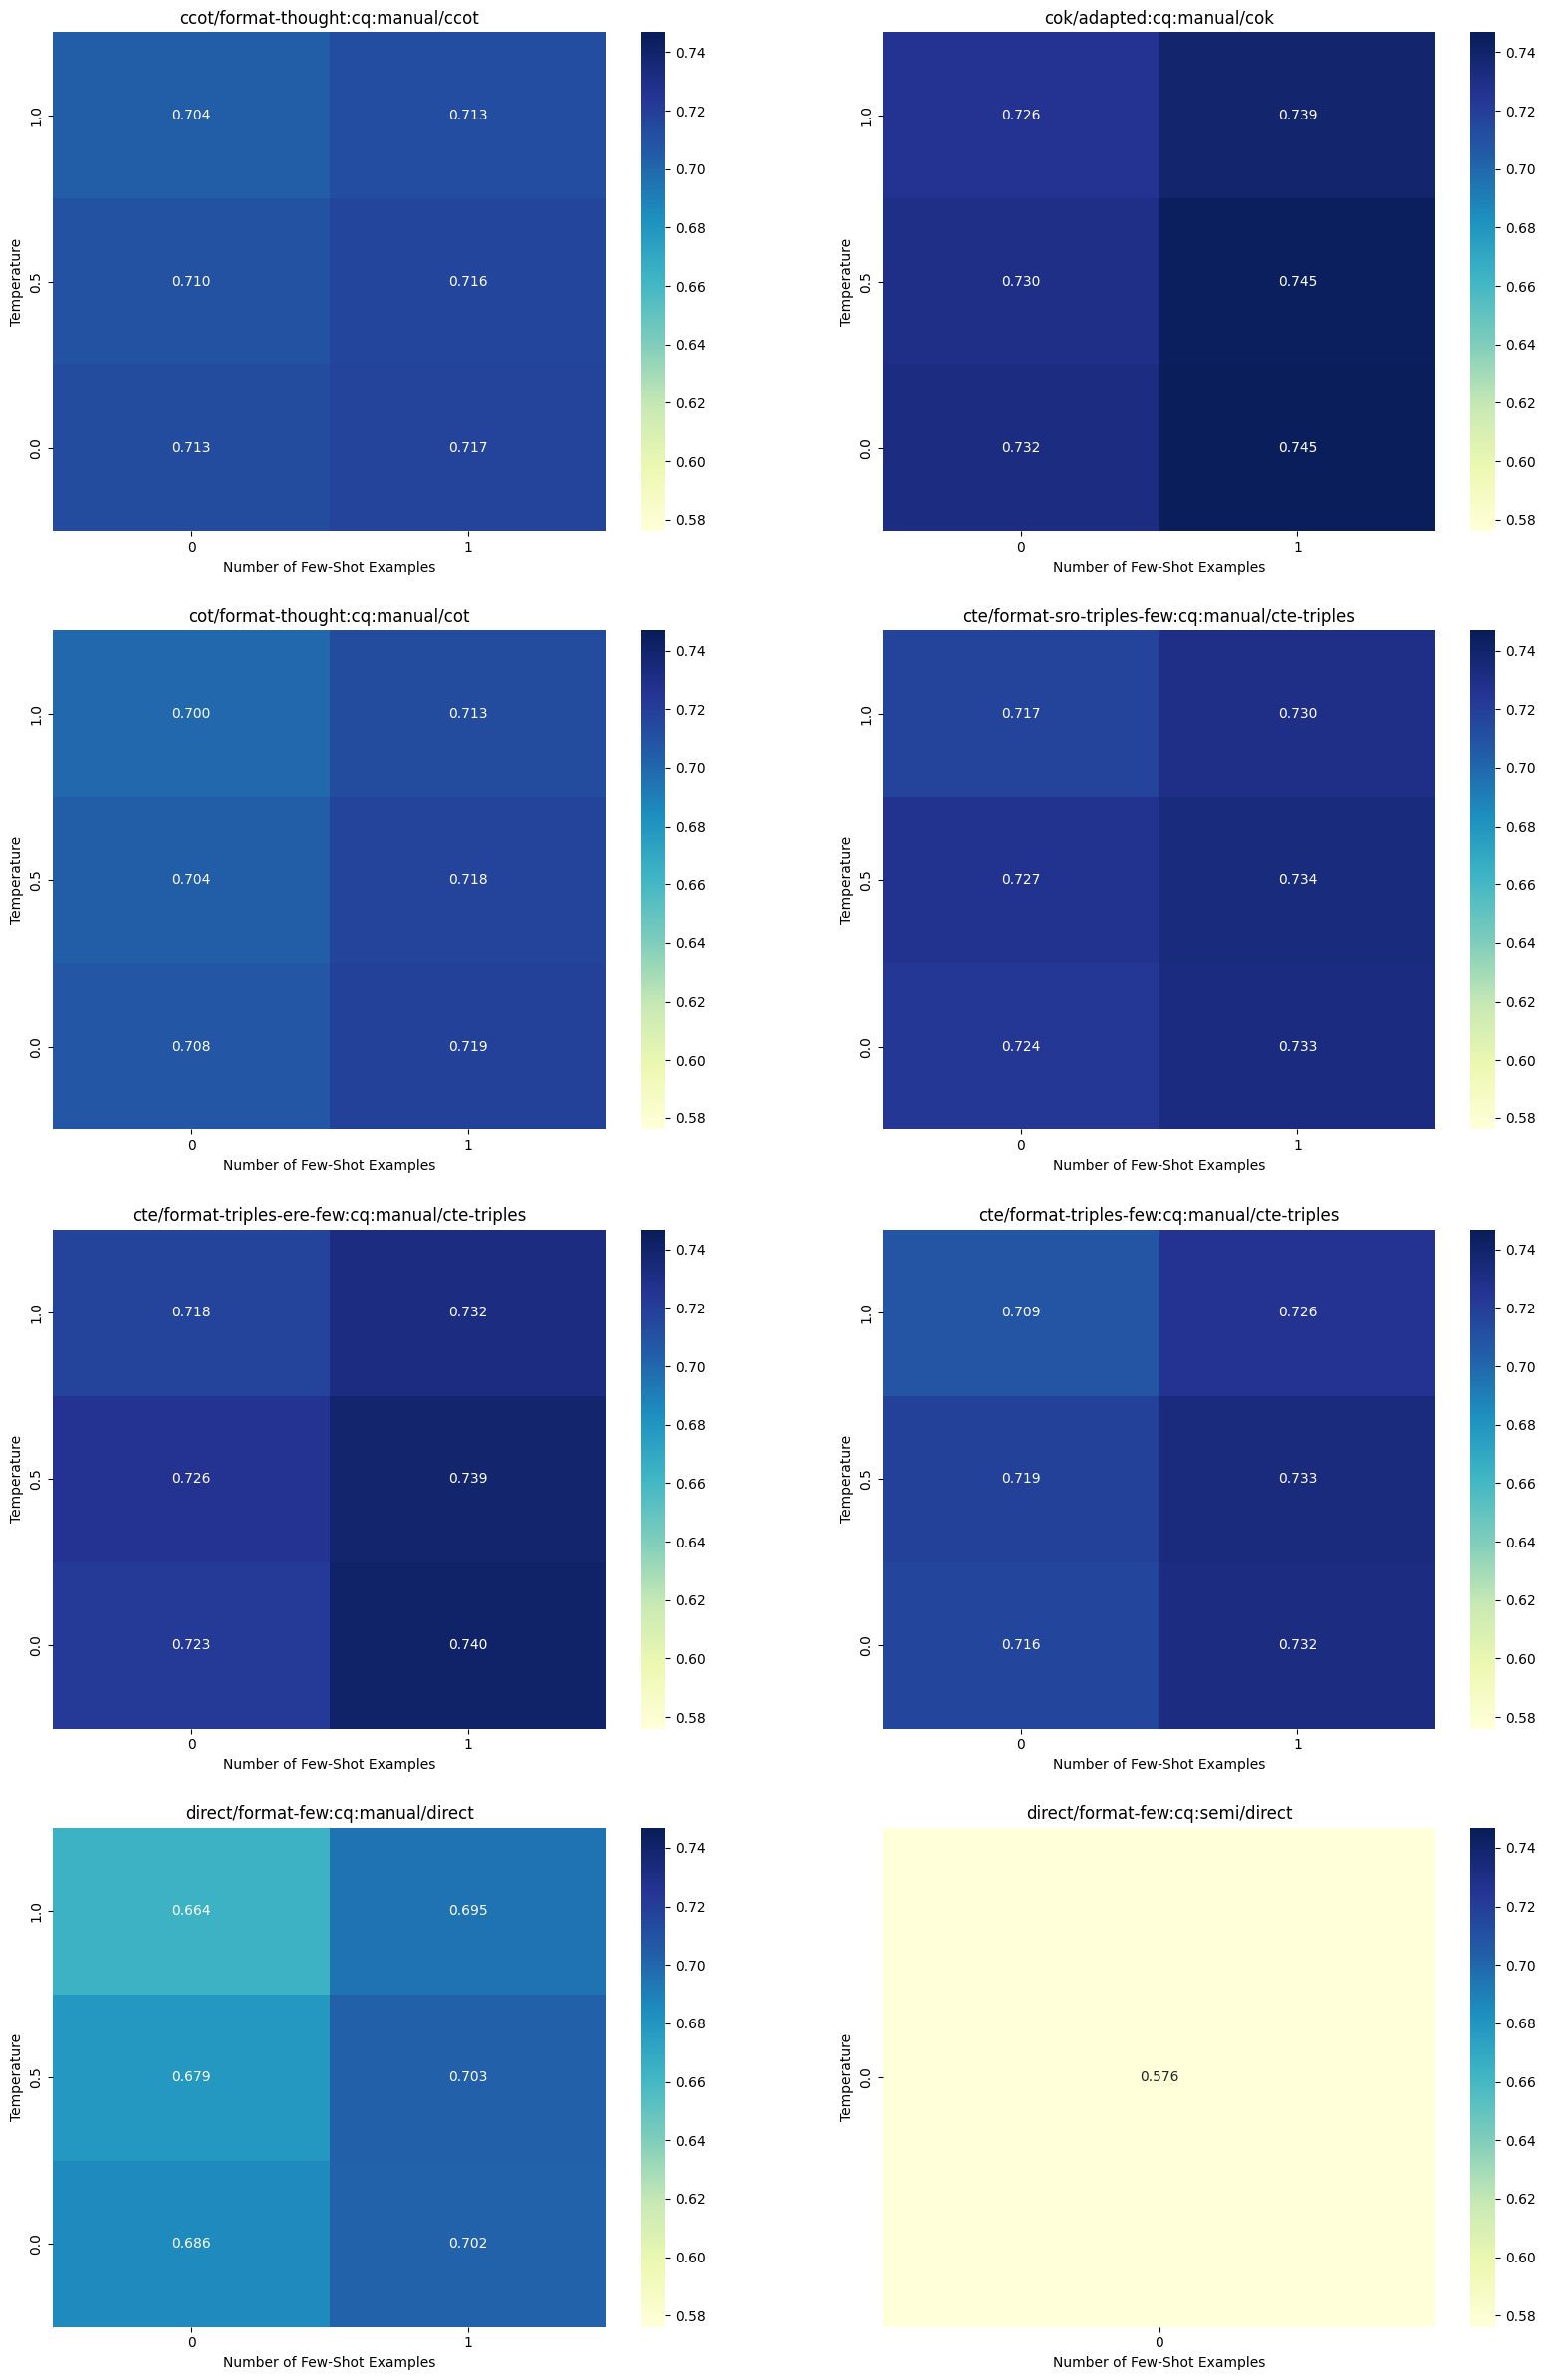

In [24]:
model = 'llama-3-70b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

In [25]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


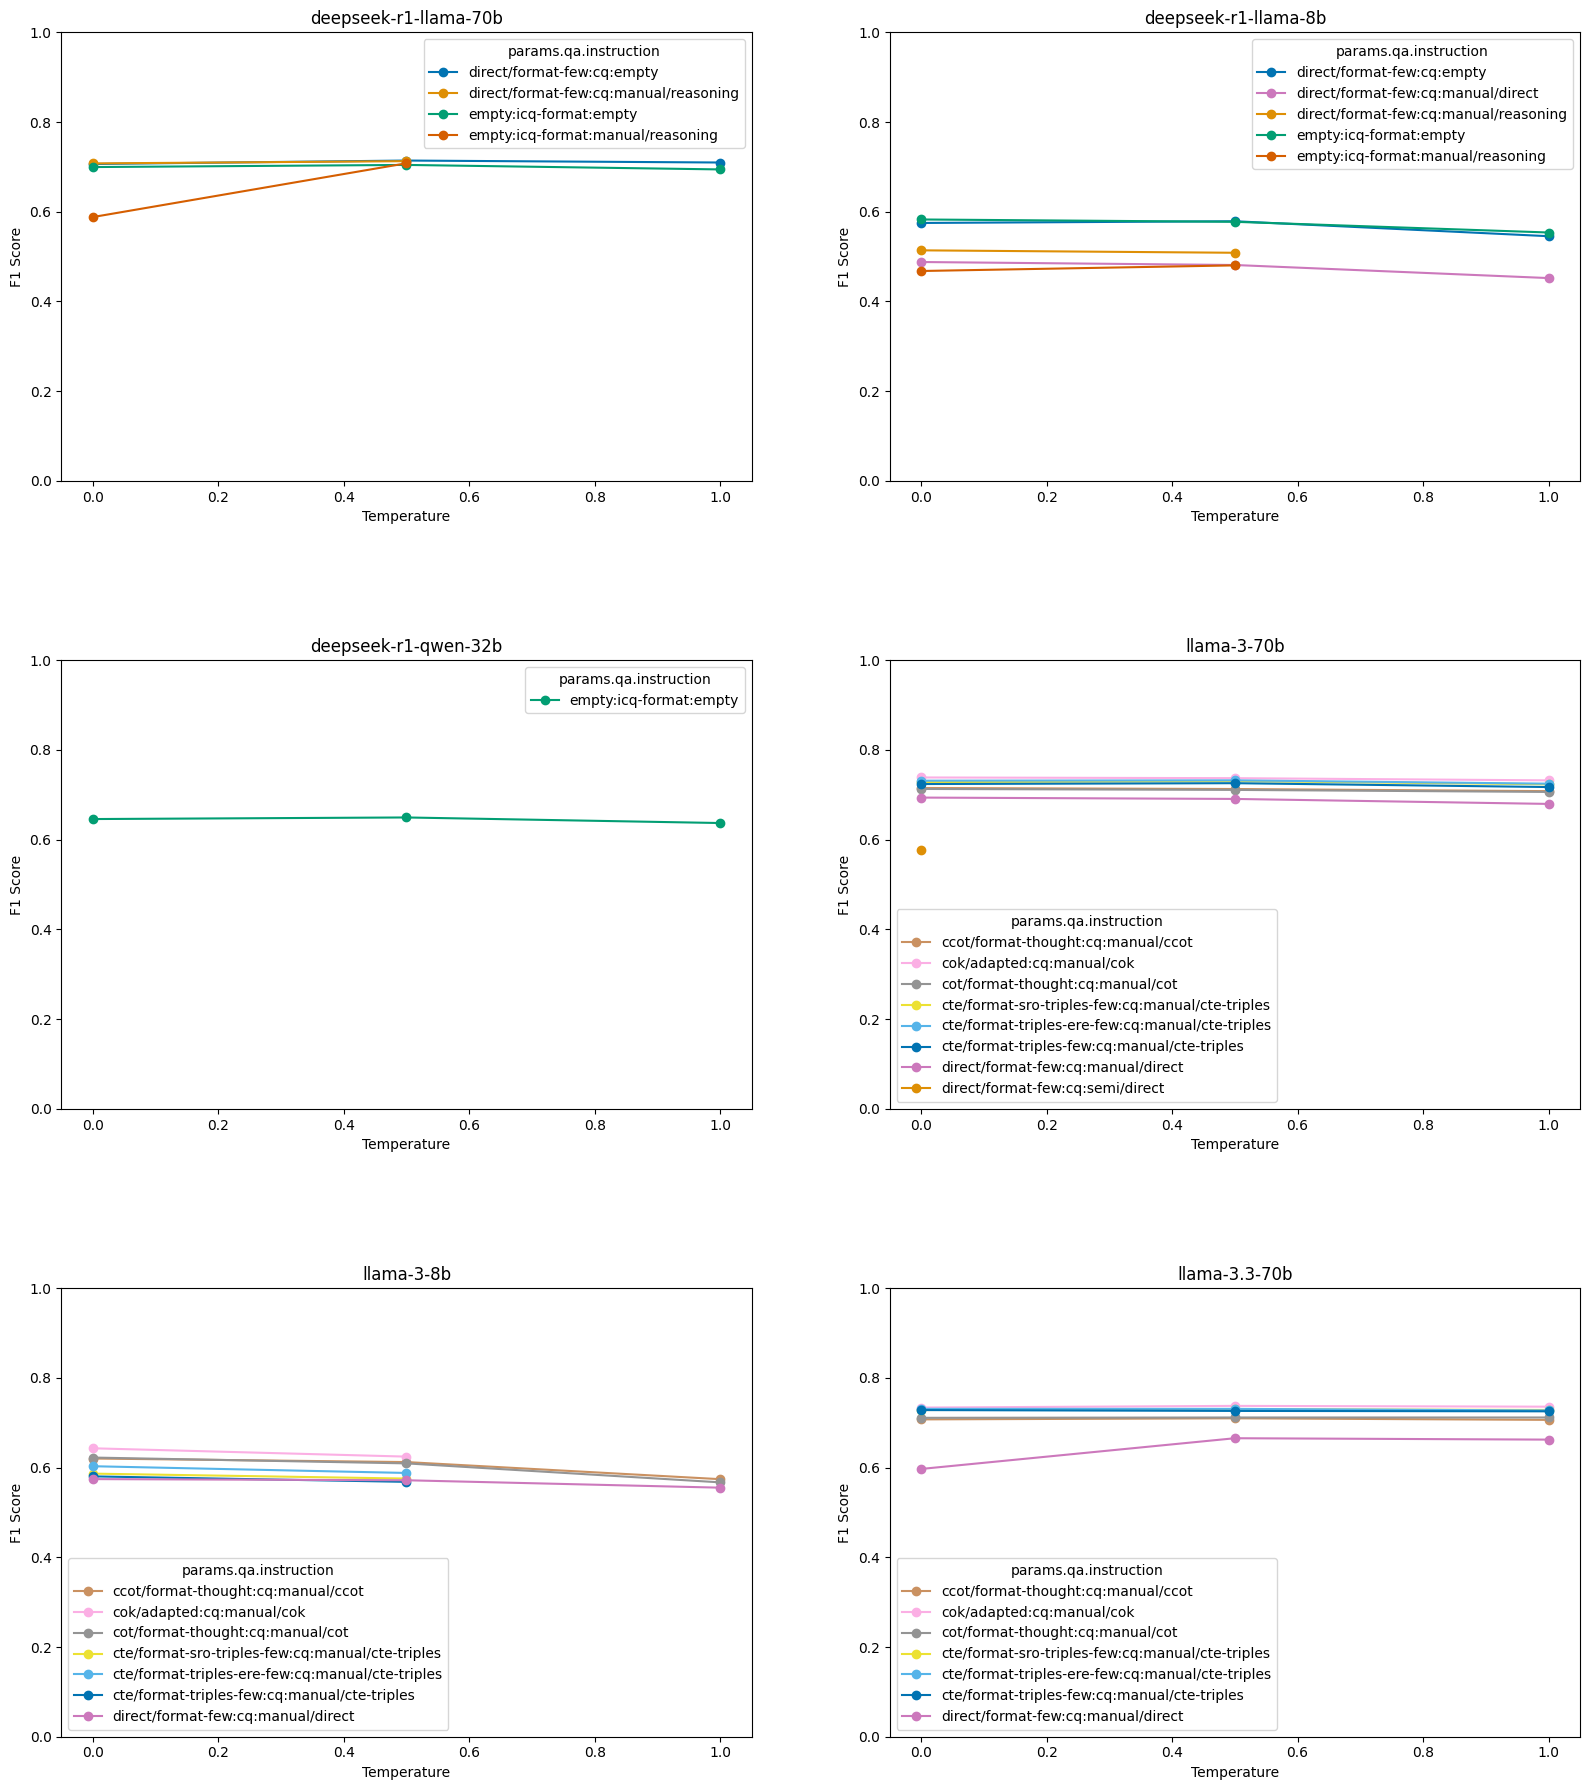

In [26]:
compare_grid(df)